# Transfer learning in image classification


---



**In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computional budget for new classification problem at hand**


In [ ]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import layers
from keras.models import Sequential

**Make predictions using ready made model(without any training)**

In [ ]:
IMAGE_SIZE = (224,224)

classifier = tf.keras.Sequential([
     hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
                    input_shape=IMAGE_SIZE + (3,))
])

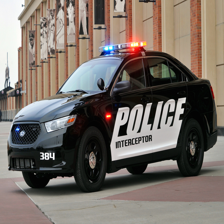

In [ ]:
police = Image.open('/content/fastest-police-vehicles-2016.jpg').resize(IMAGE_SIZE)
police

In [ ]:
police = np.array(police)/255.0
police.shape

(224, 224, 3)

In [ ]:
police[np.newaxis, ...]

array([[[[0.94117647, 0.95686275, 0.96862745],
         [0.9372549 , 0.95294118, 0.96470588],
         [0.94117647, 0.95686275, 0.96862745],
         ...,
         [0.68627451, 0.62745098, 0.53333333],
         [0.65098039, 0.58823529, 0.50196078],
         [0.6745098 , 0.60784314, 0.51764706]],

        [[0.94509804, 0.94901961, 0.96862745],
         [0.94117647, 0.95294118, 0.96862745],
         [0.94117647, 0.95294118, 0.96470588],
         ...,
         [0.68627451, 0.62745098, 0.53333333],
         [0.65098039, 0.59607843, 0.49803922],
         [0.67058824, 0.60784314, 0.52156863]],

        [[0.94901961, 0.94901961, 0.96470588],
         [0.94117647, 0.95294118, 0.96862745],
         [0.94509804, 0.95294118, 0.96862745],
         ...,
         [0.68235294, 0.62745098, 0.52941176],
         [0.6627451 , 0.59607843, 0.50196078],
         [0.6745098 , 0.61176471, 0.51372549]],

        ...,

        [[0.58823529, 0.51372549, 0.49803922],
         [0.59215686, 0.51372549, 0.49803922]

In [ ]:
result = classifier.predict(police[np.newaxis, ...])
result.shape

1/1 [==============================] - 3s 3s/step


(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

735

In [13]:
tf.keras.utils.get_file('ImageNetLabels.txt',
                        'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt',
                        cache_dir= '.')

10484/10484 [==============================] - 0s 0us/step


'./datasets/ImageNetLabels.txt'

In [15]:
image_label = []
with open('/content/datasets/ImageNetLabels.txt', 'r') as f:
  image_label = f.read().splitlines()
image_label[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [16]:
image_label[predicted_label_index]

'police van'

# Load flowers dataset

In [17]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified. which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 3s 0us/step


In [18]:
data_dir

'./datasets/flower_photos'

In [19]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [20]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/6606815161_3c4372760f.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/27466794_57e4fe5656.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/58636535_bc53ef0a21_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5967284308_85714d8cf7_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5293283002_9b17f085f7_m.jpg')]

In [21]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [22]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4654893119_45d232016b.jpg'),
 PosixPath('datasets/flower_photos/roses/15750320284_22ef21c682.jpg'),
 PosixPath('datasets/flower_photos/roses/15104537437_f6730b38c3_n.jpg')]

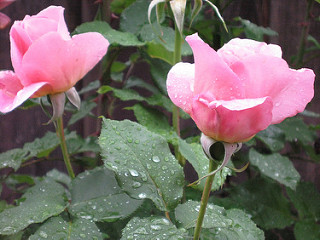

In [30]:
Image.open(str(roses[5]))

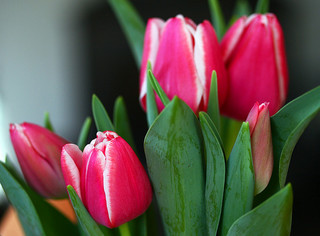

In [26]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[1]))

# Read flowers images from disk into numpy array using opencv

In [31]:
flowers_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daily': list(data_dir.glob('daily/*')),
    'dandelion': list(data_dir.glob('dadelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [32]:
flowers_labels_dict = {
  'roses': 0,
  'daily': 1,
  'danlelion': 2,
  'sunflowers': 3,
  'tulips': 4
}

In [33]:
flowers_image_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4654893119_45d232016b.jpg'),
 PosixPath('datasets/flower_photos/roses/15750320284_22ef21c682.jpg'),
 PosixPath('datasets/flower_photos/roses/15104537437_f6730b38c3_n.jpg')]

In [34]:
str(flowers_image_dict['roses'][0])

'datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'

In [35]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))

In [36]:
img.shape

(333, 500, 3)

In [42]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resize_img = cv2.resize(img, (224,224))
    X.append(resize_img)
    y.append(flowers_labels_dict[flower_name])

In [43]:
X = np.array(X)
y = np.array(y)

# Train test split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=142)

# Preprocessing: scale images

In [45]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

**Make prediction using pre-trained model on new flowers dataset**

In [46]:
X[0].shape

(224, 224, 3)

In [51]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 23ms/step


array([795, 722, 795])

In [55]:
image_label[predicted[2]]

'shower curtain'

# Now take pre-trainerd model and retrain it using flowers images

In [56]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model = hub.KerasLayer(
    feature_extractor_model, input_shape= (224,224,3), trainable= False
)

In [60]:
num_of_flowers = 5

model = keras.Sequential([
    pretrained_model,
    keras.layers.Dense(num_of_flowers, activation= 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [61]:
model.compile(
  optimizer = 'adam',
  loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
  metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs= 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


51/51 [==============================] - 9s 54ms/step - loss: 0.7601 - accuracy: 0.6789
Epoch 2/10
51/51 [==============================] - 2s 41ms/step - loss: 0.3620 - accuracy: 0.8610
Epoch 3/10
51/51 [==============================] - 2s 46ms/step - loss: 0.2887 - accuracy: 0.8909
Epoch 4/10
51/51 [==============================] - 2s 44ms/step - loss: 0.2452 - accuracy: 0.9133
Epoch 5/10
51/51 [==============================] - 2s 41ms/step - loss: 0.2103 - accuracy: 0.9258
Epoch 6/10
51/51 [==============================] - 2s 41ms/step - loss: 0.1869 - accuracy: 0.9327
Epoch 7/10
51/51 [==============================] - 2s 41ms/step - loss: 0.1683 - accuracy: 0.9495
Epoch 8/10
51/51 [==============================] - 2s 45ms/step - loss: 0.1545 - accuracy: 0.9520
Epoch 9/10
51/51 [==============================] - 2s 46ms/step - loss: 0.1367 - accuracy: 0.9638
Epoch 10/10
51/51 [==============================] - 2s 44ms/step - loss: 0.1221 - accuracy: 0.9738


In [62]:
model.evaluate(X_test_scaled,y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


17/17 [==============================] - 2s 95ms/step - loss: 0.2829 - accuracy: 0.8916


[0.2829310894012451, 0.8915888071060181]